Graduation project
Image Classification 

Imports

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from PIL import Image
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys


Load images

In [33]:
image_gen = ImageDataGenerator(rotation_range=25,
                              width_shift_range=0.1,
                              height_shift_range=0.1,rescale=1/255,shear_range=0.2,
                              zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [34]:
CURR_DIR_PATH = os.getcwd()
buildings_path = CURR_DIR_PATH + "//data//seg_train//seg_train//buildings//0.jpg"
#print(current_directory)
print(buildings_path)

c:\Users\David Krylstedt\Documents\AW_Academy\Moduler\Graduation_project\project\Graduation-project//data//seg_train//seg_train//buildings//0.jpg


In [35]:
def display_img(path):
    plt.figure(figsize=(2,2))
    read = cv2.imread(path)
    read_cvt = cv2.cvtColor(read ,cv2.COLOR_BGR2RGB)
    plt.imshow(read_cvt)
    plt.show()

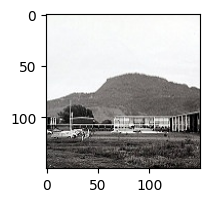

In [36]:
display_img(buildings_path)


In [37]:
seg_train_path = CURR_DIR_PATH + "//data//seg_train//seg_train"
image_gen.flow_from_directory(seg_train_path)

Found 14034 images belonging to 6 classes.


In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 128)      512       
 hNormalization)                                                 
                                                        

In [42]:
training_image =image_gen.flow_from_directory( seg_train_path, 
                                              target_size=(150,150),batch_size=25)

Found 14034 images belonging to 6 classes.


In [43]:
seg_test_path = CURR_DIR_PATH + "//data//seg_test//seg_test"
testing_image =image_gen.flow_from_directory(seg_test_path , 
                                              target_size=(150,150),batch_size=25)

Found 3000 images belonging to 6 classes.


In [45]:
steps_per_epoch = 14034//256
validation_steps =14034//256

history = model.fit_generator(generator=training_image,
                              steps_per_epoch=steps_per_epoch,
                              epochs=50,
                              validation_data=testing_image,
                              validation_steps=validation_steps)

Epoch 1/50
54/54 [==============================] - 143s 3s/step - loss: 1.3191 - accuracy: 0.5407 - val_loss: 5.0402 - val_accuracy: 0.1793
Epoch 2/50
54/54 [==============================] - 142s 3s/step - loss: 1.2757 - accuracy: 0.5607 - val_loss: 3.9095 - val_accuracy: 0.2237
Epoch 3/50
54/54 [==============================] - 134s 2s/step - loss: 1.1199 - accuracy: 0.6081 - val_loss: 3.1556 - val_accuracy: 0.2356
Epoch 4/50
54/54 [==============================] - 139s 3s/step - loss: 1.1711 - accuracy: 0.5911 - val_loss: 3.1125 - val_accuracy: 0.2504
Epoch 5/50
54/54 [==============================] - 134s 2s/step - loss: 1.0769 - accuracy: 0.6289 - val_loss: 1.6818 - val_accuracy: 0.4385
Epoch 6/50
54/54 [==============================] - 128s 2s/step - loss: 0.9874 - accuracy: 0.6400 - val_loss: 2.2700 - val_accuracy: 0.3526
Epoch 7/50
54/54 [==============================] - 123s 2s/step - loss: 0.9572 - accuracy: 0.6578 - val_loss: 1.1264 - val_accuracy: 0.5719
Epoch 8/50
54

Train model

In [46]:
model.save("image_class.h5")

Test model

Evaluate/analyze

Plot